## Data Exploration on `Toxic Comments` Dataset

In [70]:
! pip install pandas
! pip install matplotlib
! pip install numpy
! pip install nltk
! pip install swifter
! pip install seaborn
import nltk # https://www.geeksforgeeks.org/nlp/5-simple-ways-to-tokenize-text-in-python/
nltk.download('punkt_tab')  # Skip if already downloaded
nltk.download('stopwords')  # Download stopwords

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shreyanakum/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyanakum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# https://www.pythontutorials.net/blog/how-to-use-word-tokenize-in-data-frame/
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import swifter
import seaborn as sns

In [72]:
df = pd.read_csv("/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Tokenize Text

In [73]:
df['text_clean'] = df['comment_text'].fillna("")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation\nWhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D'aww! He matches this background colour I'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"""\nMore\nI can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"You, sir, are my hero. Any chance you remember..."


In [74]:
# Apply word_tokenize to the cleaned text column
df['tokens'] = df['text_clean'].apply(word_tokenize)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation\nWhy the edits made under my usern...,"[Explanation, Why, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D'aww! He matches this background colour I'm s...,"[D'aww, !, He, matches, this, background, colo..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"Hey man, I'm really not trying to edit war. It...","[Hey, man, ,, I, 'm, really, not, trying, to, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"""\nMore\nI can't make any real suggestions on ...","[``, More, I, ca, n't, make, any, real, sugges..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"You, sir, are my hero. Any chance you remember...","[You, ,, sir, ,, are, my, hero, ., Any, chance..."


In [75]:
df['text_clean'] = df['comment_text'].fillna("").astype(str) # convert nums to str

In [76]:
stop_words = set(stopwords.words('english'))
 
# Filter out stopwords from tokens
df['tokens_filtered'] = df['tokens'].apply(
    lambda x: [token for token in x if token.lower() not in stop_words]
)


In [77]:
tweet_tokenizer = TweetTokenizer()
df['tweet_tokens'] = df['text_clean'].apply(tweet_tokenizer.tokenize)

In [78]:
df['tokens'] = df['text_clean'].swifter.apply(word_tokenize)
df.head()

Pandas Apply: 100%|██████████| 159571/159571 [00:36<00:00, 4323.25it/s]


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean,tokens,tokens_filtered,tweet_tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation\nWhy the edits made under my usern...,"[Explanation, Why, the, edits, made, under, my...","[Explanation, edits, made, username, Hardcore,...","[Explanation, Why, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D'aww! He matches this background colour I'm s...,"[D'aww, !, He, matches, this, background, colo...","[D'aww, !, matches, background, colour, 'm, se...","[D'aww, !, He, matches, this, background, colo..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"Hey man, I'm really not trying to edit war. It...","[Hey, man, ,, I, 'm, really, not, trying, to, ...","[Hey, man, ,, 'm, really, trying, edit, war, ....","[Hey, man, ,, I'm, really, not, trying, to, ed..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"""\nMore\nI can't make any real suggestions on ...","[``, More, I, ca, n't, make, any, real, sugges...","[``, ca, n't, make, real, suggestions, improve...","["", More, I, can't, make, any, real, suggestio..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"You, sir, are my hero. Any chance you remember...","[You, ,, sir, ,, are, my, hero, ., Any, chance...","[,, sir, ,, hero, ., chance, remember, page, '...","[You, ,, sir, ,, are, my, hero, ., Any, chance..."


## Add Features

In [79]:
df['text_length'] = df['text_clean'].apply(len)
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['text_clean'].apply(
    lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0
)
df['capital_ratio'] = df['comment_text'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0
)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean,tokens,tokens_filtered,tweet_tokens,text_length,word_count,avg_word_length,capital_ratio
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation\nWhy the edits made under my usern...,"[Explanation, Why, the, edits, made, under, my...","[Explanation, edits, made, username, Hardcore,...","[Explanation, Why, the, edits, made, under, my...",264,43,5.162791,0.064394
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D'aww! He matches this background colour I'm s...,"[D'aww, !, He, matches, this, background, colo...","[D'aww, !, matches, background, colour, 'm, se...","[D'aww, !, He, matches, this, background, colo...",112,17,5.588235,0.071429
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"Hey man, I'm really not trying to edit war. It...","[Hey, man, ,, I, 'm, really, not, trying, to, ...","[Hey, man, ,, 'm, really, trying, edit, war, ....","[Hey, man, ,, I'm, really, not, trying, to, ed...",233,42,4.571429,0.017167
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"""\nMore\nI can't make any real suggestions on ...","[``, More, I, ca, n't, make, any, real, sugges...","[``, ca, n't, make, real, suggestions, improve...","["", More, I, can't, make, any, real, suggestio...",622,113,4.486726,0.017685
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"You, sir, are my hero. Any chance you remember...","[You, ,, sir, ,, are, my, hero, ., Any, chance...","[,, sir, ,, hero, ., chance, remember, page, '...","[You, ,, sir, ,, are, my, hero, ., Any, chance...",67,13,4.230769,0.029851


## Dataset Overview

In [80]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print(f"**Total samples:** {len(df)}")
print()
print(f"**Class distribution:**")
for col in labels:
    count = df[col].sum()
    pct = 100 * count / len(df)
    print(f"{col}: {count} ({pct}%)")

print()
df['num_labels'] = df[labels].sum(axis=1)
print("**Samples and Number of Labels**")
print(f"Samples with no labels: {(df['num_labels'] == 0).sum()}")
print(f"Samples with 1 or more labels: {(df['num_labels'] > 0).sum()}")
print(f"Samples with 2 or more labels: {(df['num_labels'] > 1).sum()}")
print(f"Samples with 3 or more labels: {(df['num_labels'] > 2).sum()}")
print(f"Samples with 4 or more labels: {(df['num_labels'] > 3).sum()}")
print(f"Samples with 5 or more labels: {(df['num_labels'] > 4).sum()}")
print(f"Samples with all 6 labels: {(df['num_labels'] > 5).sum()}")


**Total samples:** 159571

**Class distribution:**
toxic: 15294 (9.584448302009763%)
severe_toxic: 1595 (0.9995550569965721%)
obscene: 8449 (5.2948217407925%)
threat: 478 (0.2995531769557125%)
insult: 7877 (4.936360616904074%)
identity_hate: 1405 (0.8804858025581089%)

**Samples and Number of Labels**
Samples with no labels: 143346
Samples with 1 or more labels: 16225
Samples with 2 or more labels: 9865
Samples with 3 or more labels: 6385
Samples with 4 or more labels: 2176
Samples with 5 or more labels: 416
Samples with all 6 labels: 31


## Visualization of Data Distribution

### Classes Distribution

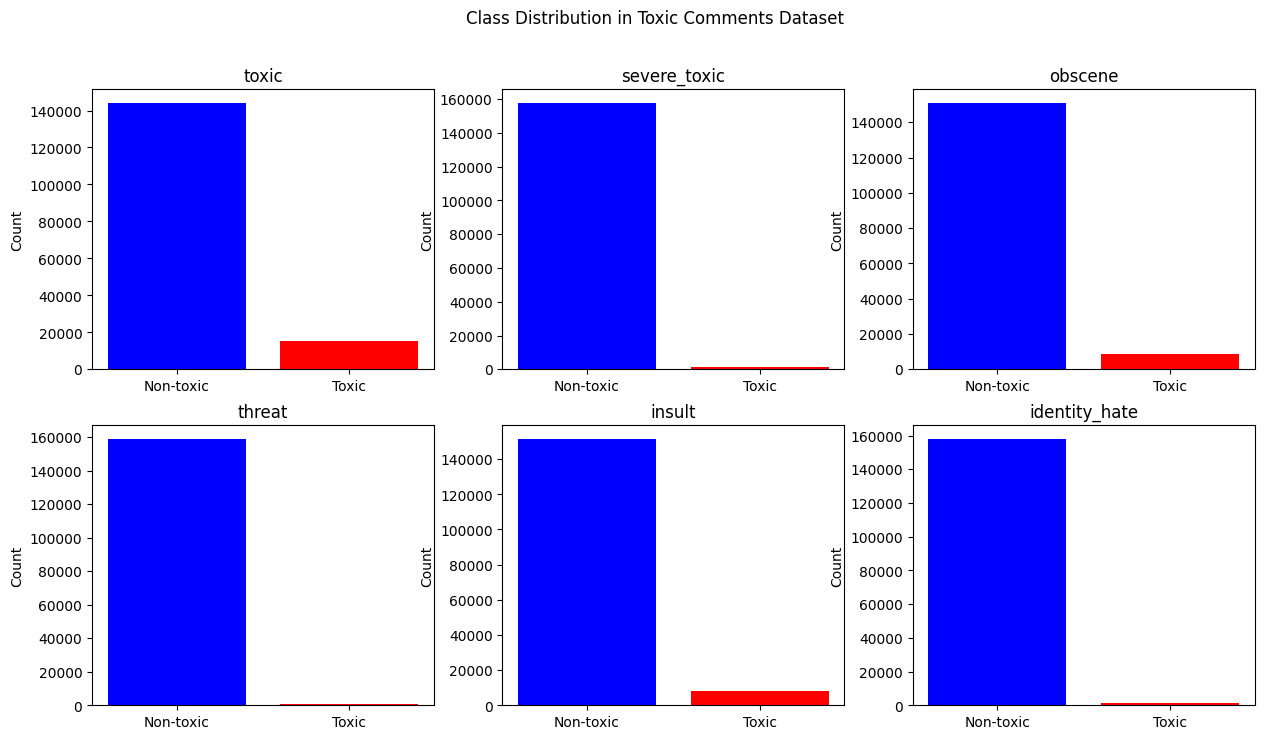

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Class Distribution in Toxic Comments Dataset')

for idx, col in enumerate(labels):
    ax = axes[idx // 3, idx % 3]
    
    counts = df[col].value_counts()
    ax.bar(['Non-toxic', 'Toxic'], counts, color=['blue', 'red'])
    ax.set_ylabel('Count')
    ax.set_title(col)

plt.show()

### Word Length, Capital Ratios, etc.

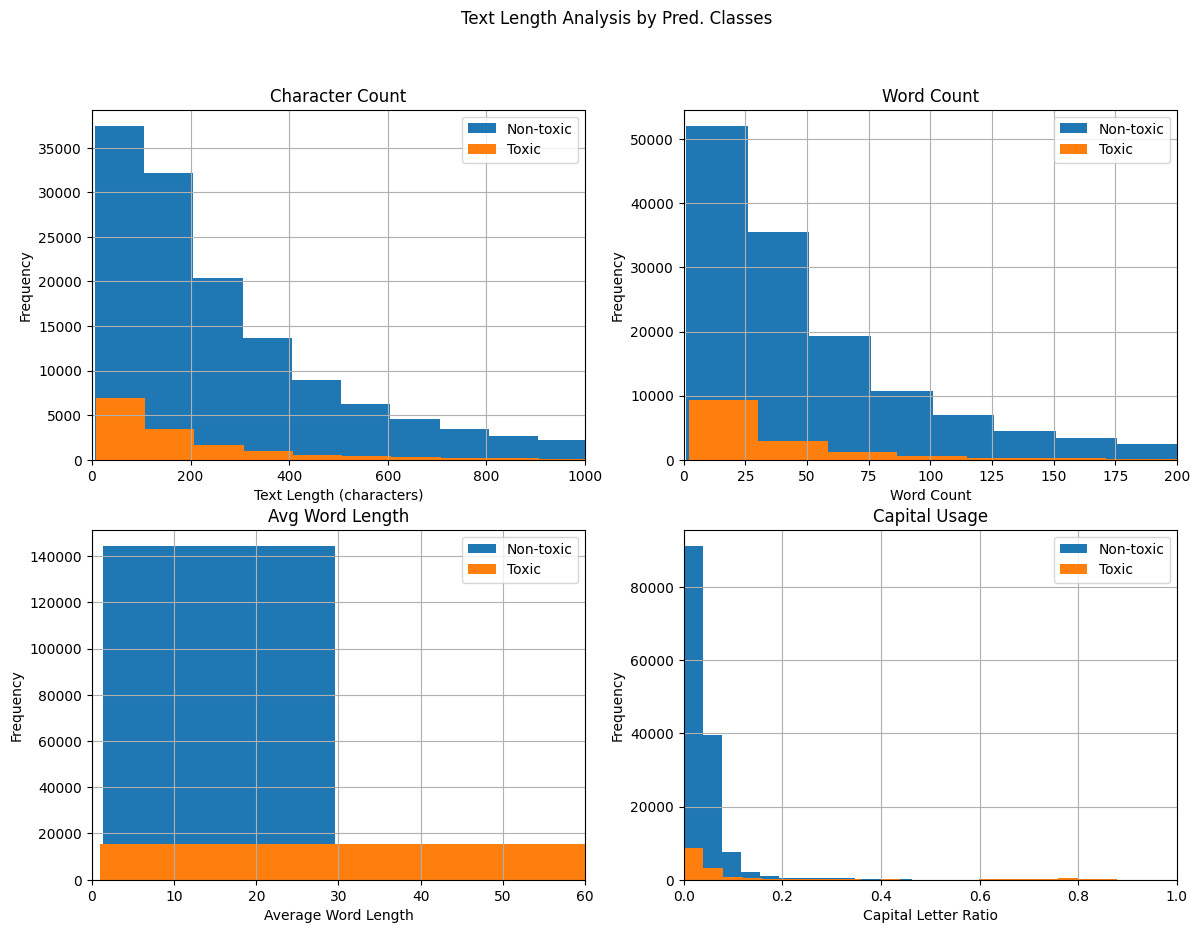

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Text Length Analysis by Pred. Classes')

# Text length
ax = axes[0, 0]
df[df['toxic'] == 0]['text_length'].hist(bins=50, label='Non-toxic', ax=ax)
df[df['toxic'] == 1]['text_length'].hist(bins=50, label='Toxic', ax=ax)
ax.set_xlabel('Text Length (characters)')
ax.set_ylabel('Frequency')
ax.set_title('Character Count')
ax.legend()
ax.set_xlim(0, 1000)

# Word count
ax = axes[0, 1]
df[df['toxic'] == 0]['word_count'].hist(bins=50, label='Non-toxic', ax=ax)
df[df['toxic'] == 1]['word_count'].hist(bins=50, label='Toxic', ax=ax)
ax.set_xlabel('Word Count')
ax.set_ylabel('Frequency')
ax.set_title('Word Count')
ax.legend()
ax.set_xlim(0, 200)

# Average word
ax = axes[1, 0]
df[df['toxic'] == 0]['avg_word_length'].hist(bins=25, label='Non-toxic', ax=ax)
df[df['toxic'] == 1]['avg_word_length'].hist(bins=25, label='Toxic', ax=ax)
ax.set_xlabel('Average Word Length')
ax.set_ylabel('Frequency')
ax.set_title('Avg Word Length')
ax.legend()
ax.set_xlim(0, 60)

# Capital letter
ax = axes[1, 1]
df[df['toxic'] == 0]['capital_ratio'].hist(bins=25, label='Non-toxic', ax=ax)
df[df['toxic'] == 1]['capital_ratio'].hist(bins=25, label='Toxic', ax=ax)
ax.set_xlabel('Capital Letter Ratio')
ax.set_ylabel('Frequency')
ax.set_title('Capital Usage')
ax.legend()
ax.set_xlim(0, 1.0)

plt.show()

### Heatmap

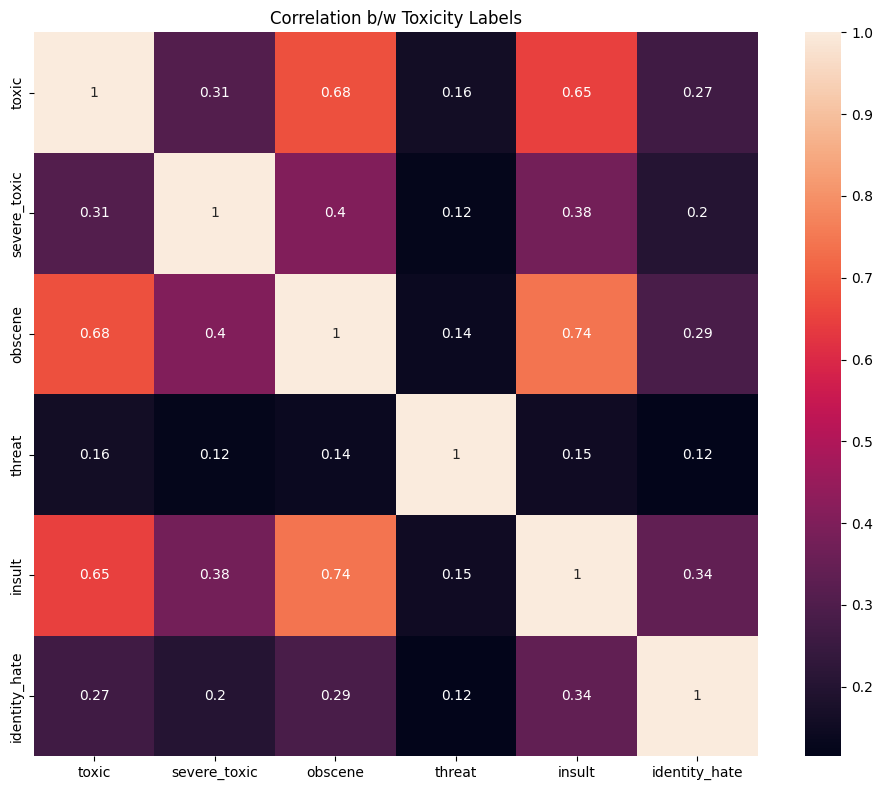

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[labels].corr()
sns.heatmap(correlation_matrix, label=True, square=True, annot=True)
plt.title('Correlation b/w Toxicity Labels')
plt.tight_layout()
plt.show()

In [87]:
df.to_csv("DATA/train_updated.csv")